In [3]:
import sys
sys.path.append('../scripts')

In [9]:
import logging
import glob
import pandas as pd
import nltk
import os

import gensim
from gensim import corpora
from gensim.corpora import Dictionary
from gensim.models.callbacks import PerplexityMetric
from gensim.models.wrappers import LdaMallet
from utils import is_punct

TOKENIZER = nltk.tokenize.word_tokenize

In [10]:
logging.basicConfig(format='%(levelname)s : %(message)s', level=logging.INFO)
logging.root.level = logging.INFO

In [11]:
CORPUS_PATH = '../corpus/INLnormalized/*.txt'
stop_words_path = '../stoplists/stoplist_INL.txt'
stop_words = [s.lower() for s in open(stop_words_path, 'r', encoding='utf-8').read().splitlines()]

NO_BELOW = 2 #minimum document frequency
NO_ABOVE = 1 #maximum document frequency

N_TOPICS = 50
ITERATIONS = 2000
OPTIMIZE_INTERVAL = 20
EVAL_EVERY = 3 # for regular LDA 
N_WORKERS = 3 # number of CPU'S for multiprocessing

In [12]:
remove_stopwords = lambda x: [word.lower() for word in x if word.lower() not in stop_words and not is_punct(word) and len(word) > 1]

texts = glob.glob(CORPUS_PATH, recursive=False)
tokenized_texts = [TOKENIZER(open(text, "r", encoding="utf-8").read(), language="dutch") for text in texts]
tokenized_texts = [remove_stopwords(text) for text in tokenized_texts]

In [13]:
texts[1]

'../corpus/INLnormalized/modern.26261.txt'

In [17]:
dictionary = Dictionary(tokenized_texts)
dictionary.filter_extremes(no_below=NO_BELOW, no_above=NO_ABOVE)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

INFO : adding document #0 to Dictionary(0 unique tokens: [])
INFO : adding document #10000 to Dictionary(112909 unique tokens: ['aar', 'ach', 'af', 'altijd', 'ander']...)
INFO : adding document #20000 to Dictionary(174950 unique tokens: ['aar', 'ach', 'af', 'altijd', 'ander']...)
INFO : built Dictionary(186692 unique tokens: ['aar', 'ach', 'af', 'altijd', 'ander']...) from 22297 documents (total 3059946 corpus positions)
INFO : discarding 114100 tokens: [('droeheyt', 1), ('ontrucket', 1), ("bloem/t'paragon", 1), ('bloemmeken', 1), ('blommeken/hier', 1), ("d'winghen", 1), ('gae/sidt/stae/altijt', 1), ('geeft/', 1), ('ghedachtenis/', 1), ("glansigh'avontsterre", 1)]...
INFO : keeping 72592 tokens which were in no less than 2 and no more than 22297 (=100.0%) documents
INFO : resulting dictionary: Dictionary(72592 unique tokens: ['aar', 'ach', 'af', 'altijd', 'ander']...)


In [11]:
lda = LdaMallet('/Users/alielassche/applications/mallet/bin/mallet', 
                corpus=corpus,
                id2word=dictionary,
                num_topics=N_TOPICS, 
                iterations=ITERATIONS,  
                workers=N_WORKERS,
                optimize_interval=OPTIMIZE_INTERVAL)

INFO : serializing temporary corpus to /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/4e0d02_corpus.txt
INFO : converting temporary corpus to MALLET format with /Users/alielassche/applications/mallet/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/4e0d02_corpus.txt --output /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/4e0d02_corpus.mallet
INFO : training MALLET LDA with /Users/alielassche/applications/mallet/bin/mallet train-topics --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/4e0d02_corpus.mallet --num-topics 50  --alpha 50 --optimize-interval 20 --num-threads 3 --output-state /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/4e0d02_state.mallet.gz --output-doc-topics /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/4e0d02_doctopics.txt --output-topic-keys /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/4e0d02_topickeys.txt --num-iterations 2000 --inferencer-filename

In [15]:
from gensim.models import CoherenceModel

# Compute Coherence score
coherence_model_ldamallet = CoherenceModel(model=lda, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)

INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO : 1 batches submitted to accumulate stats from 64 documents (1213 virtual)
INFO : 2 batches submitted to accumulate stats from 128 documents (2951 virtual)
INFO : 3 batches submitted to accumulate stats from 192 documents (4239 virtual)
INFO : 4 batches submitted to accumulate stats from 256 documents (6000 virtual)
INFO : 5 batches submitted to accumulate stats from 320 documents (7629 virtual)
INFO : 6 batches submitted to accumulate stats from 384 documents (9369 virtual)
INFO : 7 batches submitted to accumulate stats from 448 documents (11533 virtual)
INFO : 8 batches submitted to accumulate stats from 512 documents (12925 virtual)
INFO : 9 batches submitted to accumulate stats from 576 documents (15052 virtual)
INFO : 10 batches submitted to accumulate stats from 640 documents (16269 virtual)
INFO : 11 batches submitted to accumulate stats from 704 documen

INFO : 97 batches submitted to accumulate stats from 6208 documents (193609 virtual)
INFO : 98 batches submitted to accumulate stats from 6272 documents (195071 virtual)
INFO : 99 batches submitted to accumulate stats from 6336 documents (195945 virtual)
INFO : 100 batches submitted to accumulate stats from 6400 documents (197487 virtual)
INFO : 101 batches submitted to accumulate stats from 6464 documents (199072 virtual)
INFO : 102 batches submitted to accumulate stats from 6528 documents (199485 virtual)
INFO : 103 batches submitted to accumulate stats from 6592 documents (200997 virtual)
INFO : 104 batches submitted to accumulate stats from 6656 documents (203422 virtual)
INFO : 105 batches submitted to accumulate stats from 6720 documents (204573 virtual)
INFO : 106 batches submitted to accumulate stats from 6784 documents (206596 virtual)
INFO : 107 batches submitted to accumulate stats from 6848 documents (209225 virtual)
INFO : 108 batches submitted to accumulate stats from 691

INFO : 193 batches submitted to accumulate stats from 12352 documents (353707 virtual)
INFO : 194 batches submitted to accumulate stats from 12416 documents (354574 virtual)
INFO : 195 batches submitted to accumulate stats from 12480 documents (356525 virtual)
INFO : 196 batches submitted to accumulate stats from 12544 documents (358604 virtual)
INFO : 197 batches submitted to accumulate stats from 12608 documents (361555 virtual)
INFO : 198 batches submitted to accumulate stats from 12672 documents (361961 virtual)
INFO : 199 batches submitted to accumulate stats from 12736 documents (362665 virtual)
INFO : 200 batches submitted to accumulate stats from 12800 documents (365136 virtual)
INFO : 201 batches submitted to accumulate stats from 12864 documents (365898 virtual)
INFO : 202 batches submitted to accumulate stats from 12928 documents (367869 virtual)
INFO : 203 batches submitted to accumulate stats from 12992 documents (373219 virtual)
INFO : 204 batches submitted to accumulate 

INFO : 290 batches submitted to accumulate stats from 18560 documents (523273 virtual)
INFO : 291 batches submitted to accumulate stats from 18624 documents (524513 virtual)
INFO : 292 batches submitted to accumulate stats from 18688 documents (526428 virtual)
INFO : 293 batches submitted to accumulate stats from 18752 documents (528536 virtual)
INFO : 294 batches submitted to accumulate stats from 18816 documents (530481 virtual)
INFO : 295 batches submitted to accumulate stats from 18880 documents (532563 virtual)
INFO : 296 batches submitted to accumulate stats from 18944 documents (534340 virtual)
INFO : 297 batches submitted to accumulate stats from 19008 documents (536146 virtual)
INFO : 298 batches submitted to accumulate stats from 19072 documents (538765 virtual)
INFO : 299 batches submitted to accumulate stats from 19136 documents (539598 virtual)
INFO : 300 batches submitted to accumulate stats from 19200 documents (541568 virtual)
INFO : 301 batches submitted to accumulate 


Coherence Score:  0.4682887292236804


In [13]:
lda.save('INL-TM')

INFO : saving LdaMallet object under INL-TM, separately None
INFO : saved INL-TM


In [11]:
import gensim

lda = LdaMallet.load('INL-TM')

In [259]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet('/Users/alielassche/applications/mallet/bin/mallet', corpus=corpus, num_topics=num_topics, id2word=dictionary, iterations=ITERATIONS,  
                workers=N_WORKERS, optimize_interval=OPTIMIZE_INTERVAL)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=tokenized_texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [260]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=tokenized_texts, start=10, limit=110, step=10)

INFO : serializing temporary corpus to /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/746db8_corpus.txt
INFO : converting temporary corpus to MALLET format with /Users/alielassche/applications/mallet/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/746db8_corpus.txt --output /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/746db8_corpus.mallet
INFO : training MALLET LDA with /Users/alielassche/applications/mallet/bin/mallet train-topics --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/746db8_corpus.mallet --num-topics 10  --alpha 50 --optimize-interval 20 --num-threads 3 --output-state /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/746db8_state.mallet.gz --output-doc-topics /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/746db8_doctopics.txt --output-topic-keys /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/746db8_topickeys.txt --num-iterations 2000 --inferencer-filename

INFO : 83 batches submitted to accumulate stats from 5312 documents (167139 virtual)
INFO : 84 batches submitted to accumulate stats from 5376 documents (168494 virtual)
INFO : 85 batches submitted to accumulate stats from 5440 documents (172283 virtual)
INFO : 86 batches submitted to accumulate stats from 5504 documents (175143 virtual)
INFO : 87 batches submitted to accumulate stats from 5568 documents (176039 virtual)
INFO : 88 batches submitted to accumulate stats from 5632 documents (178168 virtual)
INFO : 89 batches submitted to accumulate stats from 5696 documents (180580 virtual)
INFO : 90 batches submitted to accumulate stats from 5760 documents (182139 virtual)
INFO : 91 batches submitted to accumulate stats from 5824 documents (182940 virtual)
INFO : 92 batches submitted to accumulate stats from 5888 documents (184728 virtual)
INFO : 93 batches submitted to accumulate stats from 5952 documents (185866 virtual)
INFO : 94 batches submitted to accumulate stats from 6016 documen

INFO : 180 batches submitted to accumulate stats from 11520 documents (348151 virtual)
INFO : 181 batches submitted to accumulate stats from 11584 documents (349387 virtual)
INFO : 182 batches submitted to accumulate stats from 11648 documents (351622 virtual)
INFO : 183 batches submitted to accumulate stats from 11712 documents (353859 virtual)
INFO : 184 batches submitted to accumulate stats from 11776 documents (357736 virtual)
INFO : 185 batches submitted to accumulate stats from 11840 documents (361470 virtual)
INFO : 186 batches submitted to accumulate stats from 11904 documents (363946 virtual)
INFO : 187 batches submitted to accumulate stats from 11968 documents (367780 virtual)
INFO : 188 batches submitted to accumulate stats from 12032 documents (372366 virtual)
INFO : 189 batches submitted to accumulate stats from 12096 documents (373976 virtual)
INFO : 190 batches submitted to accumulate stats from 12160 documents (375833 virtual)
INFO : 191 batches submitted to accumulate 

INFO : 275 batches submitted to accumulate stats from 17600 documents (546390 virtual)
INFO : 276 batches submitted to accumulate stats from 17664 documents (548180 virtual)
INFO : 277 batches submitted to accumulate stats from 17728 documents (550685 virtual)
INFO : 278 batches submitted to accumulate stats from 17792 documents (552571 virtual)
INFO : 279 batches submitted to accumulate stats from 17856 documents (554093 virtual)
INFO : 280 batches submitted to accumulate stats from 17920 documents (555237 virtual)
INFO : 281 batches submitted to accumulate stats from 17984 documents (556359 virtual)
INFO : 282 batches submitted to accumulate stats from 18048 documents (557374 virtual)
INFO : 283 batches submitted to accumulate stats from 18112 documents (559324 virtual)
INFO : 284 batches submitted to accumulate stats from 18176 documents (560971 virtual)
INFO : 285 batches submitted to accumulate stats from 18240 documents (562295 virtual)
INFO : 286 batches submitted to accumulate 

INFO : 2 batches submitted to accumulate stats from 128 documents (3968 virtual)
INFO : 3 batches submitted to accumulate stats from 192 documents (4719 virtual)
INFO : 4 batches submitted to accumulate stats from 256 documents (7332 virtual)
INFO : 5 batches submitted to accumulate stats from 320 documents (9318 virtual)
INFO : 6 batches submitted to accumulate stats from 384 documents (12888 virtual)
INFO : 7 batches submitted to accumulate stats from 448 documents (15637 virtual)
INFO : 8 batches submitted to accumulate stats from 512 documents (15805 virtual)
INFO : 9 batches submitted to accumulate stats from 576 documents (17698 virtual)
INFO : 10 batches submitted to accumulate stats from 640 documents (19925 virtual)
INFO : 11 batches submitted to accumulate stats from 704 documents (21399 virtual)
INFO : 12 batches submitted to accumulate stats from 768 documents (22950 virtual)
INFO : 13 batches submitted to accumulate stats from 832 documents (24893 virtual)
INFO : 14 batche

INFO : 100 batches submitted to accumulate stats from 6400 documents (199055 virtual)
INFO : 101 batches submitted to accumulate stats from 6464 documents (200981 virtual)
INFO : 102 batches submitted to accumulate stats from 6528 documents (203192 virtual)
INFO : 103 batches submitted to accumulate stats from 6592 documents (206079 virtual)
INFO : 104 batches submitted to accumulate stats from 6656 documents (208009 virtual)
INFO : 105 batches submitted to accumulate stats from 6720 documents (210008 virtual)
INFO : 106 batches submitted to accumulate stats from 6784 documents (211284 virtual)
INFO : 107 batches submitted to accumulate stats from 6848 documents (213288 virtual)
INFO : 108 batches submitted to accumulate stats from 6912 documents (214681 virtual)
INFO : 109 batches submitted to accumulate stats from 6976 documents (215589 virtual)
INFO : 110 batches submitted to accumulate stats from 7040 documents (216099 virtual)
INFO : 111 batches submitted to accumulate stats from 

INFO : 195 batches submitted to accumulate stats from 12480 documents (382077 virtual)
INFO : 196 batches submitted to accumulate stats from 12544 documents (382672 virtual)
INFO : 197 batches submitted to accumulate stats from 12608 documents (384569 virtual)
INFO : 198 batches submitted to accumulate stats from 12672 documents (385731 virtual)
INFO : 199 batches submitted to accumulate stats from 12736 documents (387118 virtual)
INFO : 200 batches submitted to accumulate stats from 12800 documents (389732 virtual)
INFO : 201 batches submitted to accumulate stats from 12864 documents (392056 virtual)
INFO : 202 batches submitted to accumulate stats from 12928 documents (393053 virtual)
INFO : 203 batches submitted to accumulate stats from 12992 documents (395594 virtual)
INFO : 204 batches submitted to accumulate stats from 13056 documents (398684 virtual)
INFO : 205 batches submitted to accumulate stats from 13120 documents (402081 virtual)
INFO : 206 batches submitted to accumulate 

INFO : 290 batches submitted to accumulate stats from 18560 documents (567649 virtual)
INFO : 291 batches submitted to accumulate stats from 18624 documents (570292 virtual)
INFO : 292 batches submitted to accumulate stats from 18688 documents (573128 virtual)
INFO : 293 batches submitted to accumulate stats from 18752 documents (575423 virtual)
INFO : 294 batches submitted to accumulate stats from 18816 documents (576960 virtual)
INFO : 295 batches submitted to accumulate stats from 18880 documents (578686 virtual)
INFO : 296 batches submitted to accumulate stats from 18944 documents (581198 virtual)
INFO : 297 batches submitted to accumulate stats from 19008 documents (584020 virtual)
INFO : 298 batches submitted to accumulate stats from 19072 documents (587478 virtual)
INFO : 299 batches submitted to accumulate stats from 19136 documents (589804 virtual)
INFO : 300 batches submitted to accumulate stats from 19200 documents (592781 virtual)
INFO : 301 batches submitted to accumulate 

INFO : 18 batches submitted to accumulate stats from 1152 documents (34148 virtual)
INFO : 19 batches submitted to accumulate stats from 1216 documents (36393 virtual)
INFO : 20 batches submitted to accumulate stats from 1280 documents (38520 virtual)
INFO : 21 batches submitted to accumulate stats from 1344 documents (40493 virtual)
INFO : 22 batches submitted to accumulate stats from 1408 documents (41748 virtual)
INFO : 23 batches submitted to accumulate stats from 1472 documents (43907 virtual)
INFO : 24 batches submitted to accumulate stats from 1536 documents (46171 virtual)
INFO : 25 batches submitted to accumulate stats from 1600 documents (47185 virtual)
INFO : 26 batches submitted to accumulate stats from 1664 documents (47742 virtual)
INFO : 27 batches submitted to accumulate stats from 1728 documents (49685 virtual)
INFO : 28 batches submitted to accumulate stats from 1792 documents (50874 virtual)
INFO : 29 batches submitted to accumulate stats from 1856 documents (52784 v

INFO : 115 batches submitted to accumulate stats from 7360 documents (223104 virtual)
INFO : 116 batches submitted to accumulate stats from 7424 documents (225476 virtual)
INFO : 117 batches submitted to accumulate stats from 7488 documents (228534 virtual)
INFO : 118 batches submitted to accumulate stats from 7552 documents (230137 virtual)
INFO : 119 batches submitted to accumulate stats from 7616 documents (232948 virtual)
INFO : 120 batches submitted to accumulate stats from 7680 documents (235339 virtual)
INFO : 121 batches submitted to accumulate stats from 7744 documents (237616 virtual)
INFO : 122 batches submitted to accumulate stats from 7808 documents (240204 virtual)
INFO : 123 batches submitted to accumulate stats from 7872 documents (242373 virtual)
INFO : 124 batches submitted to accumulate stats from 7936 documents (245096 virtual)
INFO : 125 batches submitted to accumulate stats from 8000 documents (246269 virtual)
INFO : 126 batches submitted to accumulate stats from 

INFO : 211 batches submitted to accumulate stats from 13504 documents (414436 virtual)
INFO : 212 batches submitted to accumulate stats from 13568 documents (416553 virtual)
INFO : 213 batches submitted to accumulate stats from 13632 documents (418747 virtual)
INFO : 214 batches submitted to accumulate stats from 13696 documents (422656 virtual)
INFO : 215 batches submitted to accumulate stats from 13760 documents (424858 virtual)
INFO : 216 batches submitted to accumulate stats from 13824 documents (425128 virtual)
INFO : 217 batches submitted to accumulate stats from 13888 documents (426672 virtual)
INFO : 218 batches submitted to accumulate stats from 13952 documents (427594 virtual)
INFO : 219 batches submitted to accumulate stats from 14016 documents (428634 virtual)
INFO : 220 batches submitted to accumulate stats from 14080 documents (430726 virtual)
INFO : 221 batches submitted to accumulate stats from 14144 documents (432547 virtual)
INFO : 222 batches submitted to accumulate 

INFO : 306 batches submitted to accumulate stats from 19584 documents (602288 virtual)
INFO : 307 batches submitted to accumulate stats from 19648 documents (604225 virtual)
INFO : 308 batches submitted to accumulate stats from 19712 documents (605987 virtual)
INFO : 309 batches submitted to accumulate stats from 19776 documents (609153 virtual)
INFO : 310 batches submitted to accumulate stats from 19840 documents (611911 virtual)
INFO : 311 batches submitted to accumulate stats from 19904 documents (612917 virtual)
INFO : 312 batches submitted to accumulate stats from 19968 documents (615385 virtual)
INFO : 313 batches submitted to accumulate stats from 20032 documents (618320 virtual)
INFO : 314 batches submitted to accumulate stats from 20096 documents (620320 virtual)
INFO : 315 batches submitted to accumulate stats from 20160 documents (622700 virtual)
INFO : 316 batches submitted to accumulate stats from 20224 documents (624367 virtual)
INFO : 317 batches submitted to accumulate 

INFO : 33 batches submitted to accumulate stats from 2112 documents (61404 virtual)
INFO : 34 batches submitted to accumulate stats from 2176 documents (63079 virtual)
INFO : 35 batches submitted to accumulate stats from 2240 documents (65184 virtual)
INFO : 36 batches submitted to accumulate stats from 2304 documents (66034 virtual)
INFO : 37 batches submitted to accumulate stats from 2368 documents (67919 virtual)
INFO : 38 batches submitted to accumulate stats from 2432 documents (69396 virtual)
INFO : 39 batches submitted to accumulate stats from 2496 documents (71100 virtual)
INFO : 40 batches submitted to accumulate stats from 2560 documents (72793 virtual)
INFO : 41 batches submitted to accumulate stats from 2624 documents (74753 virtual)
INFO : 42 batches submitted to accumulate stats from 2688 documents (76050 virtual)
INFO : 43 batches submitted to accumulate stats from 2752 documents (77439 virtual)
INFO : 44 batches submitted to accumulate stats from 2816 documents (80659 v

INFO : 130 batches submitted to accumulate stats from 8320 documents (254405 virtual)
INFO : 131 batches submitted to accumulate stats from 8384 documents (254920 virtual)
INFO : 132 batches submitted to accumulate stats from 8448 documents (256431 virtual)
INFO : 133 batches submitted to accumulate stats from 8512 documents (257463 virtual)
INFO : 134 batches submitted to accumulate stats from 8576 documents (257856 virtual)
INFO : 135 batches submitted to accumulate stats from 8640 documents (259294 virtual)
INFO : 136 batches submitted to accumulate stats from 8704 documents (260989 virtual)
INFO : 137 batches submitted to accumulate stats from 8768 documents (262400 virtual)
INFO : 138 batches submitted to accumulate stats from 8832 documents (263955 virtual)
INFO : 139 batches submitted to accumulate stats from 8896 documents (265372 virtual)
INFO : 140 batches submitted to accumulate stats from 8960 documents (267630 virtual)
INFO : 141 batches submitted to accumulate stats from 

INFO : 226 batches submitted to accumulate stats from 14464 documents (442550 virtual)
INFO : 227 batches submitted to accumulate stats from 14528 documents (448432 virtual)
INFO : 228 batches submitted to accumulate stats from 14592 documents (450716 virtual)
INFO : 229 batches submitted to accumulate stats from 14656 documents (452143 virtual)
INFO : 230 batches submitted to accumulate stats from 14720 documents (454168 virtual)
INFO : 231 batches submitted to accumulate stats from 14784 documents (458320 virtual)
INFO : 232 batches submitted to accumulate stats from 14848 documents (460938 virtual)
INFO : 233 batches submitted to accumulate stats from 14912 documents (463600 virtual)
INFO : 234 batches submitted to accumulate stats from 14976 documents (465122 virtual)
INFO : 235 batches submitted to accumulate stats from 15040 documents (467010 virtual)
INFO : 236 batches submitted to accumulate stats from 15104 documents (470035 virtual)
INFO : 237 batches submitted to accumulate 

INFO : 321 batches submitted to accumulate stats from 20544 documents (634663 virtual)
INFO : 322 batches submitted to accumulate stats from 20608 documents (636181 virtual)
INFO : 323 batches submitted to accumulate stats from 20672 documents (638465 virtual)
INFO : 324 batches submitted to accumulate stats from 20736 documents (639417 virtual)
INFO : 325 batches submitted to accumulate stats from 20800 documents (640400 virtual)
INFO : 326 batches submitted to accumulate stats from 20864 documents (642424 virtual)
INFO : 327 batches submitted to accumulate stats from 20928 documents (644284 virtual)
INFO : 328 batches submitted to accumulate stats from 20992 documents (646821 virtual)
INFO : 329 batches submitted to accumulate stats from 21056 documents (648036 virtual)
INFO : 330 batches submitted to accumulate stats from 21120 documents (649430 virtual)
INFO : 331 batches submitted to accumulate stats from 21184 documents (651038 virtual)
INFO : 332 batches submitted to accumulate 

INFO : 49 batches submitted to accumulate stats from 3136 documents (92942 virtual)
INFO : 50 batches submitted to accumulate stats from 3200 documents (96706 virtual)
INFO : 51 batches submitted to accumulate stats from 3264 documents (98058 virtual)
INFO : 52 batches submitted to accumulate stats from 3328 documents (99637 virtual)
INFO : 53 batches submitted to accumulate stats from 3392 documents (102480 virtual)
INFO : 54 batches submitted to accumulate stats from 3456 documents (107199 virtual)
INFO : 55 batches submitted to accumulate stats from 3520 documents (108781 virtual)
INFO : 56 batches submitted to accumulate stats from 3584 documents (110505 virtual)
INFO : 57 batches submitted to accumulate stats from 3648 documents (111843 virtual)
INFO : 58 batches submitted to accumulate stats from 3712 documents (113696 virtual)
INFO : 59 batches submitted to accumulate stats from 3776 documents (115712 virtual)
INFO : 60 batches submitted to accumulate stats from 3840 documents (

INFO : 145 batches submitted to accumulate stats from 9280 documents (280935 virtual)
INFO : 146 batches submitted to accumulate stats from 9344 documents (282530 virtual)
INFO : 147 batches submitted to accumulate stats from 9408 documents (284272 virtual)
INFO : 148 batches submitted to accumulate stats from 9472 documents (285832 virtual)
INFO : 149 batches submitted to accumulate stats from 9536 documents (286848 virtual)
INFO : 150 batches submitted to accumulate stats from 9600 documents (287416 virtual)
INFO : 151 batches submitted to accumulate stats from 9664 documents (289257 virtual)
INFO : 152 batches submitted to accumulate stats from 9728 documents (290141 virtual)
INFO : 153 batches submitted to accumulate stats from 9792 documents (291111 virtual)
INFO : 154 batches submitted to accumulate stats from 9856 documents (292453 virtual)
INFO : 155 batches submitted to accumulate stats from 9920 documents (294352 virtual)
INFO : 156 batches submitted to accumulate stats from 

INFO : 241 batches submitted to accumulate stats from 15424 documents (476529 virtual)
INFO : 242 batches submitted to accumulate stats from 15488 documents (477852 virtual)
INFO : 243 batches submitted to accumulate stats from 15552 documents (479304 virtual)
INFO : 244 batches submitted to accumulate stats from 15616 documents (482571 virtual)
INFO : 245 batches submitted to accumulate stats from 15680 documents (484581 virtual)
INFO : 246 batches submitted to accumulate stats from 15744 documents (486408 virtual)
INFO : 247 batches submitted to accumulate stats from 15808 documents (488695 virtual)
INFO : 248 batches submitted to accumulate stats from 15872 documents (491939 virtual)
INFO : 249 batches submitted to accumulate stats from 15936 documents (495273 virtual)
INFO : 250 batches submitted to accumulate stats from 16000 documents (497447 virtual)
INFO : 251 batches submitted to accumulate stats from 16064 documents (500200 virtual)
INFO : 252 batches submitted to accumulate 

INFO : 336 batches submitted to accumulate stats from 21504 documents (661286 virtual)
INFO : 337 batches submitted to accumulate stats from 21568 documents (662840 virtual)
INFO : 338 batches submitted to accumulate stats from 21632 documents (666048 virtual)
INFO : 339 batches submitted to accumulate stats from 21696 documents (668609 virtual)
INFO : 340 batches submitted to accumulate stats from 21760 documents (669766 virtual)
INFO : 341 batches submitted to accumulate stats from 21824 documents (674665 virtual)
INFO : 342 batches submitted to accumulate stats from 21888 documents (676380 virtual)
INFO : 343 batches submitted to accumulate stats from 21952 documents (677515 virtual)
INFO : 344 batches submitted to accumulate stats from 22016 documents (677941 virtual)
INFO : 345 batches submitted to accumulate stats from 22080 documents (680112 virtual)
INFO : 346 batches submitted to accumulate stats from 22144 documents (681182 virtual)
INFO : 347 batches submitted to accumulate 

INFO : 64 batches submitted to accumulate stats from 4096 documents (123117 virtual)
INFO : 65 batches submitted to accumulate stats from 4160 documents (127449 virtual)
INFO : 66 batches submitted to accumulate stats from 4224 documents (130138 virtual)
INFO : 67 batches submitted to accumulate stats from 4288 documents (134473 virtual)
INFO : 68 batches submitted to accumulate stats from 4352 documents (135855 virtual)
INFO : 69 batches submitted to accumulate stats from 4416 documents (136335 virtual)
INFO : 70 batches submitted to accumulate stats from 4480 documents (137973 virtual)
INFO : 71 batches submitted to accumulate stats from 4544 documents (140282 virtual)
INFO : 72 batches submitted to accumulate stats from 4608 documents (142033 virtual)
INFO : 73 batches submitted to accumulate stats from 4672 documents (143602 virtual)
INFO : 74 batches submitted to accumulate stats from 4736 documents (146056 virtual)
INFO : 75 batches submitted to accumulate stats from 4800 documen

INFO : 160 batches submitted to accumulate stats from 10240 documents (309710 virtual)
INFO : 161 batches submitted to accumulate stats from 10304 documents (310734 virtual)
INFO : 162 batches submitted to accumulate stats from 10368 documents (312444 virtual)
INFO : 163 batches submitted to accumulate stats from 10432 documents (314628 virtual)
INFO : 164 batches submitted to accumulate stats from 10496 documents (317700 virtual)
INFO : 165 batches submitted to accumulate stats from 10560 documents (321513 virtual)
INFO : 166 batches submitted to accumulate stats from 10624 documents (323125 virtual)
INFO : 167 batches submitted to accumulate stats from 10688 documents (326840 virtual)
INFO : 168 batches submitted to accumulate stats from 10752 documents (327529 virtual)
INFO : 169 batches submitted to accumulate stats from 10816 documents (329707 virtual)
INFO : 170 batches submitted to accumulate stats from 10880 documents (332087 virtual)
INFO : 171 batches submitted to accumulate 

INFO : 256 batches submitted to accumulate stats from 16384 documents (509903 virtual)
INFO : 257 batches submitted to accumulate stats from 16448 documents (511792 virtual)
INFO : 258 batches submitted to accumulate stats from 16512 documents (512892 virtual)
INFO : 259 batches submitted to accumulate stats from 16576 documents (514515 virtual)
INFO : 260 batches submitted to accumulate stats from 16640 documents (515531 virtual)
INFO : 261 batches submitted to accumulate stats from 16704 documents (516802 virtual)
INFO : 262 batches submitted to accumulate stats from 16768 documents (520060 virtual)
INFO : 263 batches submitted to accumulate stats from 16832 documents (521133 virtual)
INFO : 264 batches submitted to accumulate stats from 16896 documents (522597 virtual)
INFO : 265 batches submitted to accumulate stats from 16960 documents (523691 virtual)
INFO : 266 batches submitted to accumulate stats from 17024 documents (525724 virtual)
INFO : 267 batches submitted to accumulate 

INFO : accumulator serialized
INFO : serializing accumulator to return to master...
INFO : accumulator serialized
INFO : serializing accumulator to return to master...
INFO : accumulator serialized
INFO : 3 accumulators retrieved from output queue
INFO : accumulated word occurrence stats for 1030848 virtual documents
INFO : serializing temporary corpus to /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/b1d9e8_corpus.txt
INFO : converting temporary corpus to MALLET format with /Users/alielassche/applications/mallet/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/b1d9e8_corpus.txt --output /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/b1d9e8_corpus.mallet
INFO : training MALLET LDA with /Users/alielassche/applications/mallet/bin/mallet train-topics --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/b1d9e8_corpus.mallet --num-topics 70  --alpha 50 --optimize-interval 20 --num-t

INFO : 79 batches submitted to accumulate stats from 5056 documents (157293 virtual)
INFO : 80 batches submitted to accumulate stats from 5120 documents (160757 virtual)
INFO : 81 batches submitted to accumulate stats from 5184 documents (162626 virtual)
INFO : 82 batches submitted to accumulate stats from 5248 documents (163642 virtual)
INFO : 83 batches submitted to accumulate stats from 5312 documents (164991 virtual)
INFO : 84 batches submitted to accumulate stats from 5376 documents (166956 virtual)
INFO : 85 batches submitted to accumulate stats from 5440 documents (169847 virtual)
INFO : 86 batches submitted to accumulate stats from 5504 documents (172991 virtual)
INFO : 87 batches submitted to accumulate stats from 5568 documents (174236 virtual)
INFO : 88 batches submitted to accumulate stats from 5632 documents (175863 virtual)
INFO : 89 batches submitted to accumulate stats from 5696 documents (178302 virtual)
INFO : 90 batches submitted to accumulate stats from 5760 documen

INFO : 175 batches submitted to accumulate stats from 11200 documents (338448 virtual)
INFO : 176 batches submitted to accumulate stats from 11264 documents (339154 virtual)
INFO : 177 batches submitted to accumulate stats from 11328 documents (341354 virtual)
INFO : 178 batches submitted to accumulate stats from 11392 documents (342778 virtual)
INFO : 179 batches submitted to accumulate stats from 11456 documents (344969 virtual)
INFO : 180 batches submitted to accumulate stats from 11520 documents (346091 virtual)
INFO : 182 batches submitted to accumulate stats from 11648 documents (348507 virtual)
INFO : 183 batches submitted to accumulate stats from 11712 documents (350116 virtual)
INFO : 184 batches submitted to accumulate stats from 11776 documents (354200 virtual)
INFO : 185 batches submitted to accumulate stats from 11840 documents (357603 virtual)
INFO : 186 batches submitted to accumulate stats from 11904 documents (360292 virtual)
INFO : 187 batches submitted to accumulate 

INFO : 271 batches submitted to accumulate stats from 17344 documents (534516 virtual)
INFO : 272 batches submitted to accumulate stats from 17408 documents (535980 virtual)
INFO : 273 batches submitted to accumulate stats from 17472 documents (537417 virtual)
INFO : 274 batches submitted to accumulate stats from 17536 documents (539327 virtual)
INFO : 275 batches submitted to accumulate stats from 17600 documents (540591 virtual)
INFO : 276 batches submitted to accumulate stats from 17664 documents (542859 virtual)
INFO : 277 batches submitted to accumulate stats from 17728 documents (544731 virtual)
INFO : 278 batches submitted to accumulate stats from 17792 documents (547080 virtual)
INFO : 279 batches submitted to accumulate stats from 17856 documents (549061 virtual)
INFO : 280 batches submitted to accumulate stats from 17920 documents (550854 virtual)
INFO : 281 batches submitted to accumulate stats from 17984 documents (551789 virtual)
INFO : 282 batches submitted to accumulate 

INFO : loading assigned topics from /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/b43a57_state.mallet.gz
INFO : using ParallelWordOccurrenceAccumulator(processes=3, batch_size=64) to estimate probabilities from sliding windows
INFO : 1 batches submitted to accumulate stats from 64 documents (1727 virtual)
INFO : 2 batches submitted to accumulate stats from 128 documents (3968 virtual)
INFO : 3 batches submitted to accumulate stats from 192 documents (4719 virtual)
INFO : 4 batches submitted to accumulate stats from 256 documents (7332 virtual)
INFO : 5 batches submitted to accumulate stats from 320 documents (9318 virtual)
INFO : 6 batches submitted to accumulate stats from 384 documents (12888 virtual)
INFO : 7 batches submitted to accumulate stats from 448 documents (15637 virtual)
INFO : 8 batches submitted to accumulate stats from 512 documents (15805 virtual)
INFO : 9 batches submitted to accumulate stats from 576 documents (17698 virtual)
INFO : 10 batches submitted to accumul

INFO : 96 batches submitted to accumulate stats from 6144 documents (190241 virtual)
INFO : 97 batches submitted to accumulate stats from 6208 documents (192575 virtual)
INFO : 98 batches submitted to accumulate stats from 6272 documents (195369 virtual)
INFO : 99 batches submitted to accumulate stats from 6336 documents (198069 virtual)
INFO : 100 batches submitted to accumulate stats from 6400 documents (198595 virtual)
INFO : 101 batches submitted to accumulate stats from 6464 documents (200653 virtual)
INFO : 102 batches submitted to accumulate stats from 6528 documents (203028 virtual)
INFO : 103 batches submitted to accumulate stats from 6592 documents (205544 virtual)
INFO : 104 batches submitted to accumulate stats from 6656 documents (207721 virtual)
INFO : 105 batches submitted to accumulate stats from 6720 documents (209714 virtual)
INFO : 106 batches submitted to accumulate stats from 6784 documents (211121 virtual)
INFO : 107 batches submitted to accumulate stats from 6848

INFO : 192 batches submitted to accumulate stats from 12288 documents (375554 virtual)
INFO : 193 batches submitted to accumulate stats from 12352 documents (377798 virtual)
INFO : 194 batches submitted to accumulate stats from 12416 documents (379694 virtual)
INFO : 195 batches submitted to accumulate stats from 12480 documents (381037 virtual)
INFO : 196 batches submitted to accumulate stats from 12544 documents (381607 virtual)
INFO : 197 batches submitted to accumulate stats from 12608 documents (383457 virtual)
INFO : 198 batches submitted to accumulate stats from 12672 documents (384669 virtual)
INFO : 199 batches submitted to accumulate stats from 12736 documents (386113 virtual)
INFO : 200 batches submitted to accumulate stats from 12800 documents (387857 virtual)
INFO : 201 batches submitted to accumulate stats from 12864 documents (390951 virtual)
INFO : 202 batches submitted to accumulate stats from 12928 documents (391931 virtual)
INFO : 203 batches submitted to accumulate 

INFO : 287 batches submitted to accumulate stats from 18368 documents (560693 virtual)
INFO : 288 batches submitted to accumulate stats from 18432 documents (563948 virtual)
INFO : 289 batches submitted to accumulate stats from 18496 documents (564951 virtual)
INFO : 290 batches submitted to accumulate stats from 18560 documents (565991 virtual)
INFO : 291 batches submitted to accumulate stats from 18624 documents (567665 virtual)
INFO : 292 batches submitted to accumulate stats from 18688 documents (571147 virtual)
INFO : 293 batches submitted to accumulate stats from 18752 documents (573723 virtual)
INFO : 294 batches submitted to accumulate stats from 18816 documents (574905 virtual)
INFO : 295 batches submitted to accumulate stats from 18880 documents (577285 virtual)
INFO : 296 batches submitted to accumulate stats from 18944 documents (578747 virtual)
INFO : 297 batches submitted to accumulate stats from 19008 documents (581072 virtual)
INFO : 298 batches submitted to accumulate 

INFO : 14 batches submitted to accumulate stats from 896 documents (25715 virtual)
INFO : 15 batches submitted to accumulate stats from 960 documents (27671 virtual)
INFO : 16 batches submitted to accumulate stats from 1024 documents (29268 virtual)
INFO : 17 batches submitted to accumulate stats from 1088 documents (31388 virtual)
INFO : 18 batches submitted to accumulate stats from 1152 documents (34148 virtual)
INFO : 19 batches submitted to accumulate stats from 1216 documents (36393 virtual)
INFO : 20 batches submitted to accumulate stats from 1280 documents (38520 virtual)
INFO : 21 batches submitted to accumulate stats from 1344 documents (40493 virtual)
INFO : 22 batches submitted to accumulate stats from 1408 documents (41748 virtual)
INFO : 23 batches submitted to accumulate stats from 1472 documents (43907 virtual)
INFO : 24 batches submitted to accumulate stats from 1536 documents (46100 virtual)
INFO : 25 batches submitted to accumulate stats from 1600 documents (47085 vir

INFO : 111 batches submitted to accumulate stats from 7104 documents (216937 virtual)
INFO : 112 batches submitted to accumulate stats from 7168 documents (217399 virtual)
INFO : 113 batches submitted to accumulate stats from 7232 documents (218017 virtual)
INFO : 114 batches submitted to accumulate stats from 7296 documents (221464 virtual)
INFO : 115 batches submitted to accumulate stats from 7360 documents (222831 virtual)
INFO : 116 batches submitted to accumulate stats from 7424 documents (225258 virtual)
INFO : 117 batches submitted to accumulate stats from 7488 documents (228385 virtual)
INFO : 118 batches submitted to accumulate stats from 7552 documents (229678 virtual)
INFO : 119 batches submitted to accumulate stats from 7616 documents (232386 virtual)
INFO : 120 batches submitted to accumulate stats from 7680 documents (234956 virtual)
INFO : 121 batches submitted to accumulate stats from 7744 documents (237373 virtual)
INFO : 122 batches submitted to accumulate stats from 

INFO : 207 batches submitted to accumulate stats from 13248 documents (404723 virtual)
INFO : 208 batches submitted to accumulate stats from 13312 documents (406299 virtual)
INFO : 209 batches submitted to accumulate stats from 13376 documents (409235 virtual)
INFO : 210 batches submitted to accumulate stats from 13440 documents (411626 virtual)
INFO : 211 batches submitted to accumulate stats from 13504 documents (413837 virtual)
INFO : 212 batches submitted to accumulate stats from 13568 documents (415759 virtual)
INFO : 213 batches submitted to accumulate stats from 13632 documents (417262 virtual)
INFO : 214 batches submitted to accumulate stats from 13696 documents (421967 virtual)
INFO : 215 batches submitted to accumulate stats from 13760 documents (423990 virtual)
INFO : 216 batches submitted to accumulate stats from 13824 documents (424667 virtual)
INFO : 217 batches submitted to accumulate stats from 13888 documents (426024 virtual)
INFO : 218 batches submitted to accumulate 

INFO : 302 batches submitted to accumulate stats from 19328 documents (594697 virtual)
INFO : 303 batches submitted to accumulate stats from 19392 documents (596650 virtual)
INFO : 304 batches submitted to accumulate stats from 19456 documents (598011 virtual)
INFO : 305 batches submitted to accumulate stats from 19520 documents (599245 virtual)
INFO : 306 batches submitted to accumulate stats from 19584 documents (600950 virtual)
INFO : 307 batches submitted to accumulate stats from 19648 documents (603409 virtual)
INFO : 308 batches submitted to accumulate stats from 19712 documents (604969 virtual)
INFO : 309 batches submitted to accumulate stats from 19776 documents (607863 virtual)
INFO : 310 batches submitted to accumulate stats from 19840 documents (610281 virtual)
INFO : 311 batches submitted to accumulate stats from 19904 documents (612097 virtual)
INFO : 312 batches submitted to accumulate stats from 19968 documents (614282 virtual)
INFO : 313 batches submitted to accumulate 

INFO : 29 batches submitted to accumulate stats from 1856 documents (52694 virtual)
INFO : 30 batches submitted to accumulate stats from 1920 documents (54796 virtual)
INFO : 31 batches submitted to accumulate stats from 1984 documents (55820 virtual)
INFO : 32 batches submitted to accumulate stats from 2048 documents (58513 virtual)
INFO : 33 batches submitted to accumulate stats from 2112 documents (61404 virtual)
INFO : 34 batches submitted to accumulate stats from 2176 documents (63079 virtual)
INFO : 35 batches submitted to accumulate stats from 2240 documents (65184 virtual)
INFO : 36 batches submitted to accumulate stats from 2304 documents (66034 virtual)
INFO : 37 batches submitted to accumulate stats from 2368 documents (67919 virtual)
INFO : 38 batches submitted to accumulate stats from 2432 documents (69396 virtual)
INFO : 39 batches submitted to accumulate stats from 2496 documents (71100 virtual)
INFO : 40 batches submitted to accumulate stats from 2560 documents (72793 v

INFO : 126 batches submitted to accumulate stats from 8064 documents (247735 virtual)
INFO : 127 batches submitted to accumulate stats from 8128 documents (249465 virtual)
INFO : 128 batches submitted to accumulate stats from 8192 documents (251700 virtual)
INFO : 129 batches submitted to accumulate stats from 8256 documents (253425 virtual)
INFO : 130 batches submitted to accumulate stats from 8320 documents (254336 virtual)
INFO : 131 batches submitted to accumulate stats from 8384 documents (254855 virtual)
INFO : 132 batches submitted to accumulate stats from 8448 documents (256331 virtual)
INFO : 133 batches submitted to accumulate stats from 8512 documents (257365 virtual)
INFO : 134 batches submitted to accumulate stats from 8576 documents (257726 virtual)
INFO : 135 batches submitted to accumulate stats from 8640 documents (259169 virtual)
INFO : 136 batches submitted to accumulate stats from 8704 documents (260824 virtual)
INFO : 137 batches submitted to accumulate stats from 

INFO : 222 batches submitted to accumulate stats from 14208 documents (434452 virtual)
INFO : 223 batches submitted to accumulate stats from 14272 documents (436520 virtual)
INFO : 224 batches submitted to accumulate stats from 14336 documents (439090 virtual)
INFO : 225 batches submitted to accumulate stats from 14400 documents (440031 virtual)
INFO : 226 batches submitted to accumulate stats from 14464 documents (442284 virtual)
INFO : 227 batches submitted to accumulate stats from 14528 documents (448036 virtual)
INFO : 228 batches submitted to accumulate stats from 14592 documents (450530 virtual)
INFO : 229 batches submitted to accumulate stats from 14656 documents (451879 virtual)
INFO : 230 batches submitted to accumulate stats from 14720 documents (453172 virtual)
INFO : 231 batches submitted to accumulate stats from 14784 documents (457990 virtual)
INFO : 232 batches submitted to accumulate stats from 14848 documents (460325 virtual)
INFO : 233 batches submitted to accumulate 

INFO : 317 batches submitted to accumulate stats from 20288 documents (624578 virtual)
INFO : 318 batches submitted to accumulate stats from 20352 documents (627287 virtual)
INFO : 319 batches submitted to accumulate stats from 20416 documents (629650 virtual)
INFO : 320 batches submitted to accumulate stats from 20480 documents (632234 virtual)
INFO : 321 batches submitted to accumulate stats from 20544 documents (634096 virtual)
INFO : 322 batches submitted to accumulate stats from 20608 documents (635792 virtual)
INFO : 323 batches submitted to accumulate stats from 20672 documents (637668 virtual)
INFO : 324 batches submitted to accumulate stats from 20736 documents (638789 virtual)
INFO : 325 batches submitted to accumulate stats from 20800 documents (639692 virtual)
INFO : 326 batches submitted to accumulate stats from 20864 documents (641852 virtual)
INFO : 327 batches submitted to accumulate stats from 20928 documents (643544 virtual)
INFO : 328 batches submitted to accumulate 

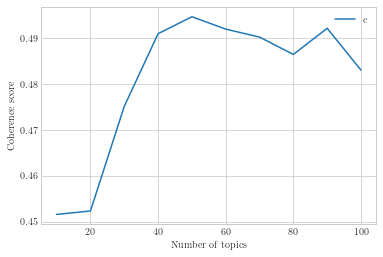

In [261]:
# Show graph
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

limit=110; start=10; step=10;
x = range(start, limit, step)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(x, coherence_values)
plt.xlabel("Number of topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.savefig('coherence_values_2_10_100.pdf')

In [16]:
rows = []
for topic in range(0, N_TOPICS):
    words = lda.show_topic(topic)
    topic_n_words = ' '.join([word[0] for word in words])
    print('Topic {}: {}'.format(str(topic), topic_n_words))
    rows.append([str(topic), topic_n_words])
keys = pd.DataFrame(rows, columns=['topic', 'words'])

Topic 0: hun leven gods vreugde eeuwig godt heemels heemel vrome dood
Topic 1: du end dijn heer deinen huur fijn myn dyne zek
Topic 2: er nog jk zy dog zeer vader trouw kind adieu
Topic 3: heer iesus jesus christus petrus godt vinden weer zegge twee
Topic 4: mens leven lust rust zek hert ziel vreugde alles gemoed
Topic 5: vals mens tong boos haat elk schijn snood lust waarheid
Topic 6: wijn drinken sa bier glas boer lustig geld bacchus wy
Topic 7: godt volk israel heere coninck man heeren ginck david abraham
Topic 8: heer hun volk godt heeren heil woord naâm zek hen
Topic 9: leven wereld godt mens tijd eeuwig sterven doden dood zonde
Topic 10: schoonheid haer deugd lof scholen glans goud siet wit leven
Topic 11: jij er kom nauw ja och mede meysje weer zien
Topic 12: ich das mein vnnd mir ein mich jn nitt zei
Topic 13: kerk geloof gods eerst nieuw christus godes zeer eigen heer
Topic 14: stad waren moeten prins wy graef enten binnen menig laten
Topic 15: zek zee hand heen water volk blo

In [17]:
keys.to_csv('INL_keys.csv', sep='\t')

In [19]:
transformed_docs = lda.load_document_topics()
docs = [[texts[indx]] + [p[1] for p in doc] for indx, doc in enumerate(transformed_docs)]
composition = pd.DataFrame(docs, columns=['document_id'] + ['topic {}'.format(x) for x in range(0, N_TOPICS)])

In [20]:
composition.head()

,document_id,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,...,topic 40,topic 41,topic 42,topic 43,topic 44,topic 45,topic 46,topic 47,topic 48,topic 49
0,Corpus/INLnormalized/modern.36072.txt,0.005843,0.000028,0.138850,0.000148,0.023751,0.000276,0.000190,0.000160,0.000186,...,0.000219,0.000144,0.017897,0.000233,0.000068,0.052345,0.000219,0.000179,0.000335,0.000243
1,Corpus/INLnormalized/modern.26261.txt,0.000144,0.000063,0.000402,0.000329,0.014227,0.000611,0.000422,0.000354,0.000413,...,0.000485,0.000319,0.539195,0.000517,0.000151,0.000763,0.000486,0.000398,0.000743,0.000540
2,Corpus/INLnormalized/modern.112064.txt,0.000140,0.000061,0.100298,0.000320,0.001383,0.000596,0.000411,0.000345,0.062844,...,0.000473,0.000311,0.263473,0.000504,0.000147,0.000744,0.225263,0.000388,0.000724,0.000526
3,Corpus/INLnormalized/modern.20610.txt,0.000117,0.000051,0.000327,0.000267,0.001153,0.000497,0.000343,0.000288,0.000335,...,0.000394,0.000259,0.001016,0.000420,0.000123,0.115114,0.000395,0.000323,0.000604,0.000439
4,Corpus/INLnormalized/modern.116202.txt,0.000037,0.000016,0.000103,0.062160,0.000362,0.000156,0.000108,0.000090,0.000105,...,0.085070,0.003349,0.242090,0.000132,0.000039,0.000195,0.000124,0.000101,0.179884,0.000138


In [22]:
composition[['path', 'songid']] = composition.document_id.str.split('/modern.', expand=True)
composition = composition.drop(columns=['document_id', 'path'])
composition[['id', 'txt']] = composition.songid.str.split('.', expand=True)
composition = composition.drop(columns=['songid', 'txt'])

In [23]:
col_names = ([f'topic {i}' for i in range(0, 50)])
col_names.insert(0, 'id')
composition = composition[col_names]

In [24]:
composition.head()

,id,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,...,topic 40,topic 41,topic 42,topic 43,topic 44,topic 45,topic 46,topic 47,topic 48,topic 49
0,36072,0.005843,0.000028,0.138850,0.000148,0.023751,0.000276,0.000190,0.000160,0.000186,...,0.000219,0.000144,0.017897,0.000233,0.000068,0.052345,0.000219,0.000179,0.000335,0.000243
1,26261,0.000144,0.000063,0.000402,0.000329,0.014227,0.000611,0.000422,0.000354,0.000413,...,0.000485,0.000319,0.539195,0.000517,0.000151,0.000763,0.000486,0.000398,0.000743,0.000540
2,112064,0.000140,0.000061,0.100298,0.000320,0.001383,0.000596,0.000411,0.000345,0.062844,...,0.000473,0.000311,0.263473,0.000504,0.000147,0.000744,0.225263,0.000388,0.000724,0.000526
3,20610,0.000117,0.000051,0.000327,0.000267,0.001153,0.000497,0.000343,0.000288,0.000335,...,0.000394,0.000259,0.001016,0.000420,0.000123,0.115114,0.000395,0.000323,0.000604,0.000439
4,116202,0.000037,0.000016,0.000103,0.062160,0.000362,0.000156,0.000108,0.000090,0.000105,...,0.085070,0.003349,0.242090,0.000132,0.000039,0.000195,0.000124,0.000101,0.179884,0.000138


In [25]:
composition.to_csv('INL_topics.csv', sep='\t')

In [323]:
def format_topics_sentences(ldamodel=lda, corpus=corpus, texts=tokenized_texts, doc_path=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        doc_id = doc_path[i]
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([doc_id, int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['id', 'Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda, corpus=corpus, texts=tokenized_texts)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'id', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords']

# Show
df_dominant_topic.head(10)

INFO : serializing temporary corpus to /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_corpus.txt
INFO : converting temporary corpus to MALLET format with /Users/alielassche/applications/mallet/bin/mallet import-file --preserve-case --keep-sequence --remove-stopwords --token-regex "\S+" --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_corpus.txt --output /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_corpus.mallet.infer --use-pipe-from /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_corpus.mallet
INFO : inferring topics with MALLET LDA '/Users/alielassche/applications/mallet/bin/mallet infer-topics --input /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_corpus.mallet.infer --inferencer /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_inferencer.mallet --output-doc-topics /var/folders/h3/_6gy9k2x3tgbm9pj_grj43rr0000gn/T/87e3a5_doctopics.txt.infer --num-iterations 100 --doc-topics-threshold 0.0 --random-seed 0'


,Document_No,id,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,Corpus/VARDnormalized/varded50/186989.txt,7.0,0.3199,"nog, min, dog, hert, liefde, leven, ligt, ziel...","[gulde, zon, maan, mindre, hemelvieren, starge..."
1,1,Corpus/VARDnormalized/varded50/3644.txt,5.0,0.5450,"dijn, god, dij, du, mit, hen, zullen, wt, alle...","[recht, oordeelt, kruis, armen, noot, god, lie..."
2,2,Corpus/VARDnormalized/varded50/38949.txt,34.0,0.4973,"mof, boer, hond, gat, heel, baard, zei, hans, ...","[vos, had, brood, kraan, genoot, meest, houden..."
3,3,Corpus/VARDnormalized/varded50/114233.txt,1.0,0.2351,"god, gods, haren, vreugd, stond, leven, boven,...","[lauwe, ziel, oog, aandachtig, wendt, heilig, ..."
4,4,Corpus/VARDnormalized/varded50/19987.txt,39.0,0.9779,"la, fa, ha, le, je, vous, hu, est, qui, pour","[maman, ay, bien, vous, conter, mais, il, ne, ..."
5,5,Corpus/VARDnormalized/varded50/186751.txt,24.0,0.5549,"hun, god, volk, zijne, zich, hen, hart, leven,...","[kent, juda, god, naam, israël, salem, trouw, ..."
6,6,Corpus/VARDnormalized/varded50/36964.txt,20.0,0.2694,"oft, hert, enen, hun, mijnen, liefde, vier, mi...","[zij-worm, graf, syd, taf, begraven, scheen, l..."
7,7,Corpus/VARDnormalized/varded50/38791.txt,27.0,0.3023,"god, gods, woord, geest, leven, recht, wet, me...","[vermach, gods, gebod, bewaren, god, jongsten,..."
8,8,Corpus/VARDnormalized/varded50/118409.txt,6.0,0.6916,"dijn, god, dij, vader, geest, herten, wt, noot...","[ansiet, lijden, sterckheydt, noot, beswijcke,..."
9,9,Corpus/VARDnormalized/varded50/100246.txt,7.0,0.4316,"nog, min, dog, hert, liefde, leven, ligt, ziel...","[ach, tweede, ziel, mijne, herderinne, blijven..."


In [27]:
transformed_docs = lda.load_document_topics()
docs = [[texts[i]] + [r[0] for r in list(zip(max(row, key=lambda x:x[1])))] for i, row in enumerate(transformed_docs)]
dominant_topics = pd.DataFrame(docs, columns=['document_id', 'dominant_topic', 'perc_contribution'])
dominant_topics[['path', 'songid']] = dominant_topics.document_id.str.split('/modern.', expand=True)
dominant_topics = dominant_topics.drop(columns=['document_id', 'path'])
dominant_topics[['id', 'txt']] = dominant_topics.songid.str.split('.', expand=True)
dominant_topics = dominant_topics.drop(columns=['songid', 'txt'])
dominant_topics = dominant_topics[['id','dominant_topic','perc_contribution']]
dominant_topics.to_csv('INL_dominant_topics.csv', sep='\t')

In [31]:
dominant_topics.groupby('dominant_topic')['id'].count().sort_values(ascending=False).to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &    id \\\\\ndominant\\_topic &       \\\\\n\\midrule\n24             &  1337 \\\\\n39             &  1113 \\\\\n21             &   965 \\\\\n4              &   952 \\\\\n25             &   910 \\\\\n38             &   903 \\\\\n16             &   862 \\\\\n26             &   859 \\\\\n33             &   807 \\\\\n15             &   759 \\\\\n30             &   671 \\\\\n42             &   663 \\\\\n37             &   576 \\\\\n20             &   550 \\\\\n22             &   510 \\\\\n2              &   496 \\\\\n11             &   492 \\\\\n34             &   462 \\\\\n6              &   459 \\\\\n9              &   452 \\\\\n3              &   430 \\\\\n8              &   425 \\\\\n41             &   407 \\\\\n43             &   394 \\\\\n29             &   369 \\\\\n10             &   354 \\\\\n28             &   351 \\\\\n40             &   332 \\\\\n47             &   330 \\\\\n45             &   316 \\\\\n5              &   267 \\\\\n49      

In [12]:
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda)

In [23]:
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus, dictionary, sort_topics=False)
vis

/Users/alielassche/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Users/alielassche/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Users/alielassche/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/Users/alielassche/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
0     -0.037792  0.048941       1        1  0.875586
1     -0.059989 -0.196189       2        1  0.470522
2      0.076486  0.050736       3        1  2.167311
3     -0.050279 -0.066156       4        1  1.566883
4     -0.054244  0.163518       5        1  4.445450
5     -0.039405  0.031131       6        1  1.802169
6      0.179727 -0.011476       7        1  1.659413
7     -0.046406 -0.118670       8        1  1.851632
8     -0.093942 -0.022000       9        1  2.227350
9     -0.122913  0.065829      10        1  2.503187
10     0.070970  0.115215      11        1  1.664041
11     0.204226  0.004166      12        1  1.742587
12     0.219250 -0.161567      13        1  0.441566
13    -0.053577 -0.021886      14        1  1.083430
14     0.024815 -0.133260      15        1  1.501558
15     0.051810  0.058629      16        1  4.168210
16    -0.160289 -0.063252      17        1  4.348361
17    -0.057573  0.034068      18        1  1.139859
18    -0.019348 -0.080042      19        1  1.079968
19    -0.154310 -0.147157      20        1  1.227067
20     0.169984  0.112516      21        1  1.734574
21    -0.176656 -0.073149      22        1  4.519340
22     0.011444  0.085122      23        1  1.548886
23    -0.082284  0.061835      24        1  1.007758
24    -0.020592  0.206508      25        1  3.998447
25     0.072446  0.201590      26        1  2.501100
26    -0.067535  0.056732      27        1  2.708656
27     0.087239  0.056827      28        1  1.323487
28    -0.082667 -0.206302      29        1  1.127241
29    -0.113332 -0.026212      30        1  1.598574
30    -0.167053 -0.057271      31        1  3.225430
31     0.267655 -0.190437      32        1  0.417253
32     0.121318 -0.050901      33        1  1.261826
33    -0.188744  0.023073      34        1  4.201975
34    -0.090492  0.057404      35        1  1.691719
35     0.248637 -0.154696      36        1  0.204200
36     0.179808 -0.142840      37        1  0.495816
37     0.179867  0.168408      38        1  1.580572
38     0.007365  0.056870      39        1  5.337215
39    -0.056931  0.101224      40        1  3.781463
40    -0.089369 -0.003581      41        1  1.750245
41    -0.058098 -0.038337      42        1  1.421538
42    -0.136498  0.045378      43        1  3.871655
43     0.015024  0.106758      44        1  1.530291
44     0.199239 -0.009660      45        1  0.553346
45    -0.061089  0.164544      46        1  2.087914
46     0.100914  0.061704      47        1  1.207867
47    -0.181918 -0.142426      48        1  1.774444
48    -0.069641 -0.055106      49        1  1.986622
49     0.104741  0.033847      50        1  1.584402, topic_info=      Category          Freq       Term         Total  loglift  logprob
term                                                                   
614    Default  21157.000000       godt  21157.000000  30.0000  30.0000
54     Default  21104.000000       heer  21104.000000  29.0000  29.0000
71     Default  10528.000000     liefde  10528.000000  28.0000  28.0000
123    Default  10989.000000    vreugde  10989.000000  27.0000  27.0000
154    Default   4420.000000        end   4420.000000  26.0000  26.0000
149    Default   4152.000000       dijn   4152.000000  25.0000  25.0000
55     Default  11582.000000       hert  11582.000000  24.0000  24.0000
3300   Default   1974.000000         la   1974.000000  23.0000  23.0000
134    Default  11782.000000       ziel  11782.000000  22.0000  22.0000
151    Default   3125.000000         du   3125.000000  21.0000  21.0000
217    Default   4535.000000        hun   4535.000000  20.0000  20.0000
386    Default   8015.000000       gods   8015.000000  19.0000  19.0000
70     Default  21930.000000      leven  21930.000000  18.0000  18.0000
214    Default   7266.000000      heere   7266.000000  17.0000  17.0000
615    Default   5143.000000      godts   5143.00

In [24]:
pyLDAvis.save_html(vis, 'INL_lda.html')

In [328]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

ValueError: Length mismatch: Expected axis has 5 elements, new values have 4 elements

In [28]:
# Number of Documents for Each Topic
topic_counts = dominant_topics['dominant_topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics.to_csv('INL_dominant_topics.csv', sep='\t')

In [29]:
df_dominant_topics.sort_values(by='Num_Documents', ascending=False).head(50)

,Num_Documents,Perc_Documents
24,1337,0.0600
39,1113,0.0499
21,965,0.0433
4,952,0.0427
25,910,0.0408
38,903,0.0405
16,862,0.0387
26,859,0.0385
33,807,0.0362
15,759,0.0340


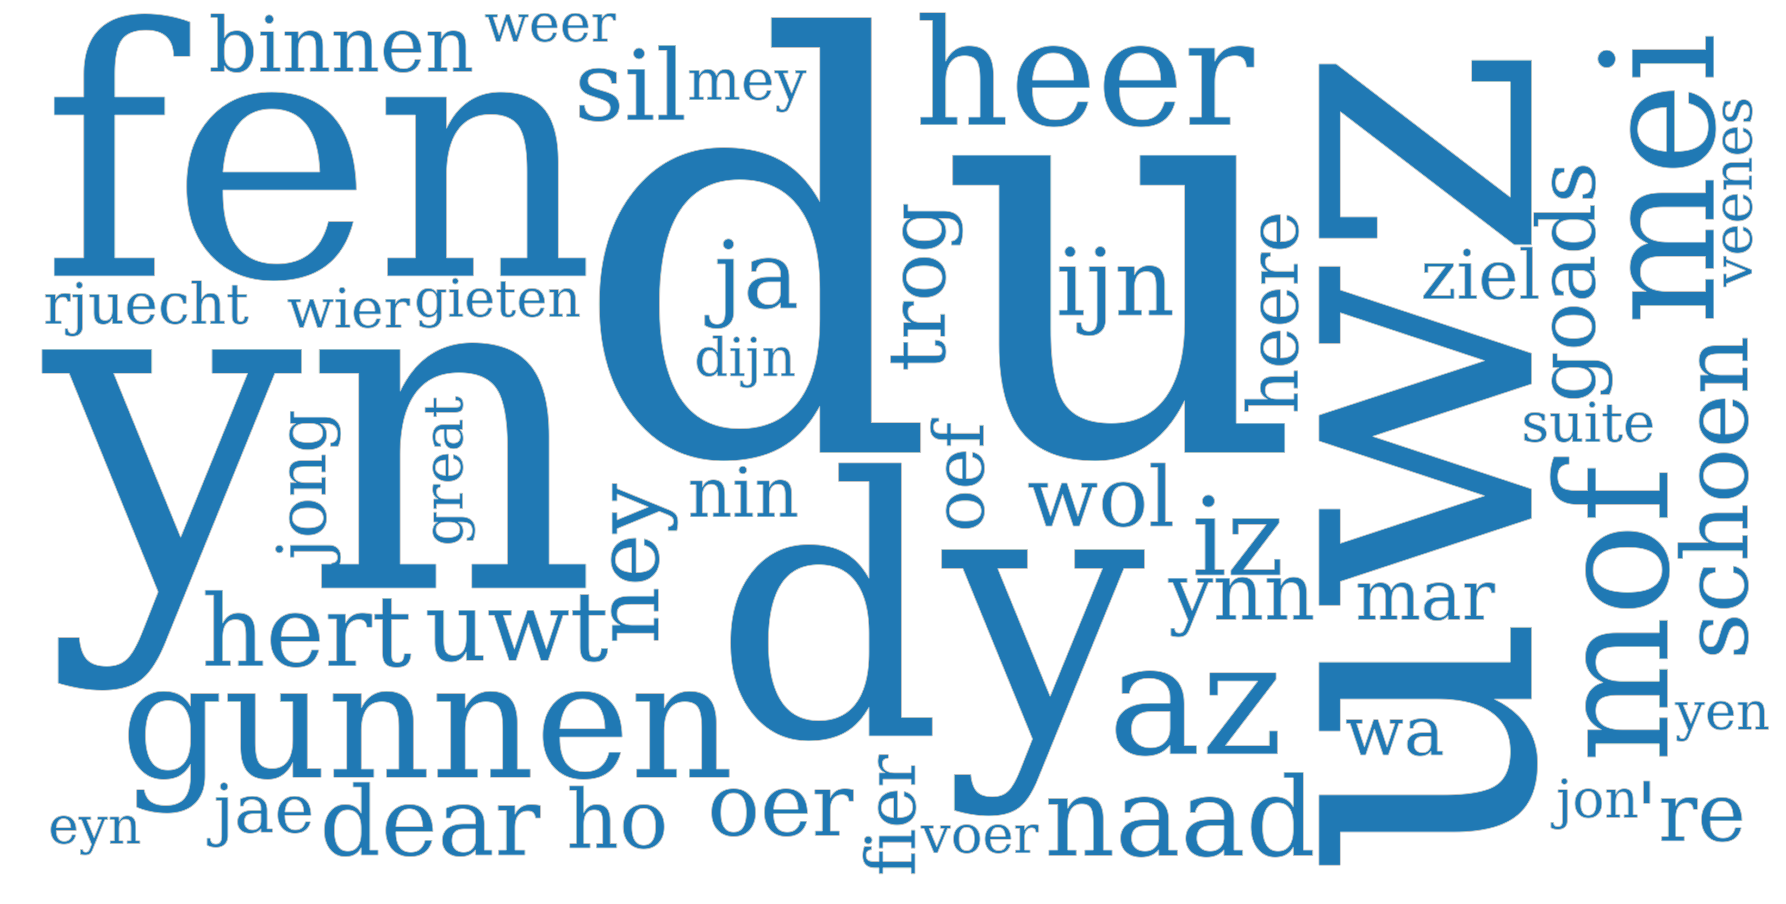

In [41]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

%matplotlib inline

TOPIC_N = 36
NUMBER_OF_WORDS = 50
words = dict(lda.show_topic(TOPIC_N, NUMBER_OF_WORDS))
wc = WordCloud(width=3200, height=1600, background_color="rgba(255, 255, 255, 0)", mode="RGBA",
                              min_font_size=15,
                            font_path="/Users/alielassche/Downloads/DejaVuSerif.ttf", margin=10,
                               color_func=lambda *args, **kwargs: (32,121,180),
                              colormap='tab10')
wc.generate_from_frequencies(words)
plt.figure(figsize=(32,16))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.savefig('INL_topic38.pdf', bbox_inches='tight')